In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("healthcare-dataset-stroke-data.csv")

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

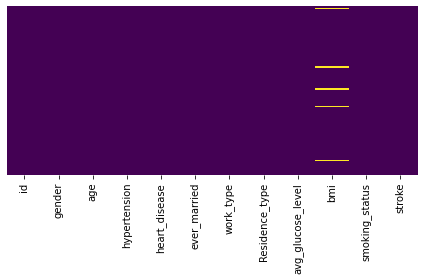

In [6]:
#Visualizing - NaN values - NULL
import seaborn as sns
def get_heatmap(data):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(data)

In [7]:
#data processing Droping the null values
data=data.dropna()
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


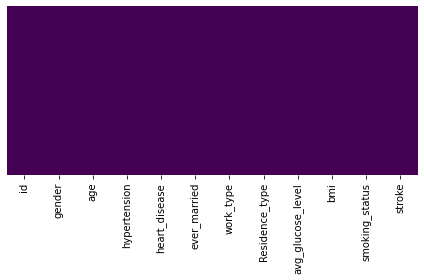

In [8]:
#Visualizing - NaN values - NULL
import seaborn as sns
def get_heatmap(data):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(data)

In [9]:
data = data.drop("id", axis = 1)

In [10]:
index = data[data["gender"] == "Other"].index
data = data.drop(index)

In [11]:
list = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]

In [12]:
#stroke heavily inbalanced
for i in range(len(list)):
    print("**********")
    print("Variable:", list[i])
    print(data[list[i]].value_counts())

**********
Variable: gender
Female    2897
Male      2011
Name: gender, dtype: int64
**********
Variable: hypertension
0    4457
1     451
Name: hypertension, dtype: int64
**********
Variable: heart_disease
0    4665
1     243
Name: heart_disease, dtype: int64
**********
Variable: ever_married
Yes    3204
No     1704
Name: ever_married, dtype: int64
**********
Variable: work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
**********
Variable: Residence_type
Urban    2490
Rural    2418
Name: Residence_type, dtype: int64
**********
Variable: smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64
**********
Variable: stroke
0    4699
1     209
Name: stroke, dtype: int64


In [13]:
numerical_list = ["avg_glucose_level", "bmi"]

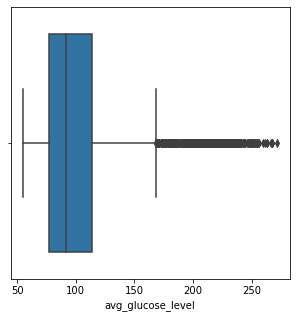

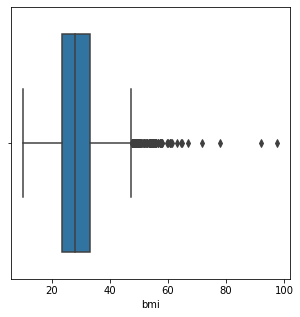

In [14]:
for i in range(len(numerical_list)):
    plt.figure(figsize = (5, 5))
    sns.boxplot(x=data[numerical_list[i]])

In [15]:
for i in numerical_list:
    Q1 = np.percentile(data[i], 25)
    Q3 = np.percentile(data[i], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1.25 * IQR
    lower = Q1 - 1.25 * IQR
    anomaly = (data[i] >= upper) | (data[i] <= lower)
    #print("First shape of data before removing outliers:", np.shape(data))
    #print("Anomaly points in", i)
    #print("")
    #print(np.where(anomaly))
    data.drop(data.index[anomaly], axis = 0, inplace = True) 
    #print("")
    #print("New shape of data after remowing outliers:", np.shape(data))
    #print("**************")
data = data.reset_index(drop = True)

<AxesSubplot:>

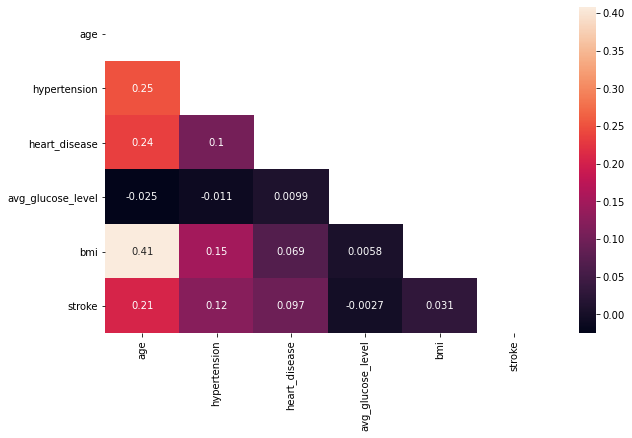

In [16]:
correlation_matrix = data.corr(method = "spearman")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True, mask = mask)

In [17]:
categorical_list = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

In [18]:
from sklearn import preprocessing 
label_encoder =preprocessing.LabelEncoder()

In [19]:
for i in range(len(categorical_list)):
    data[categorical_list[i]] = label_encoder.fit_transform(data[categorical_list[i]])

In [20]:
X = data.drop("stroke", axis = 1)
y = data["stroke"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 , random_state = 24)

In [26]:
from sklearn import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegression
models = {
    'GaussianNB': GaussianNB(),
    
    'LogisticRegression': LogisticRegression(),
    
    
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    
}

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
for x in models:
    model = models[x]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print("Model Name:", model)
    print("")
    print(classification_report(y_test, prediction))
    
   

Model Name: GaussianNB()

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       808
           1       0.10      0.32      0.15        25

    accuracy                           0.89       833
   macro avg       0.54      0.61      0.55       833
weighted avg       0.95      0.89      0.92       833

Model Name: LogisticRegression()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       808
           1       0.00      0.00      0.00        25

    accuracy                           0.97       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.94      0.97      0.96       833

Model Name: DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       808
           1       0.19      0.20      0.19        25

    accuracy                           0.95       833
   macro avg       0.58      0

C:\Users\91984\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91984\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
